In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

In [2]:
pd.set_option('display.max_rows', 500)

Data Preparation
 - represent the final data structure

JOHN HOPKINS COVID-19 csse data

In [3]:
data_path=r"D:\EDS\ads_covid_19\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"
pd_raw=pd.read_csv(data_path)

In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [5]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/15/22', '6/16/22', '6/17/22', '6/18/22', '6/19/22', '6/20/22',
       '6/21/22', '6/22/22', '6/23/22', '6/24/22'],
      dtype='object', length=885)

In [6]:
time_idx=pd_raw.columns[4:]

In [7]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [9]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [10]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [11]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

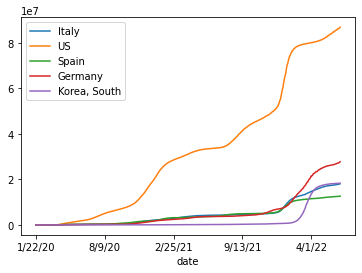

In [12]:
%matplotlib inline
df_plot.set_index('date').plot()

Data with datetime object

In [13]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [14]:
df_plot.date[0]

'1/22/20'

In [15]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [16]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [18]:
df_plot.to_csv(r"D:\EDS\ads_covid_19\data\processed\COVID_small_flat_table.csv",sep=';',index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [19]:
data_path=r"D:\EDS\ads_covid_19\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv"
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [20]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})

In [21]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,NaN,Albania,0,0,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [22]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [23]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [24]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [25]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [26]:
df_plot.to_csv(r"D:\EDS\ads_covid_19\data\processed\COVID_relational_confirmed.csv",sep=';')